Data Science for the Geosciences, 2022
       
Author: Lijing Wang (lijing52@stanford.edu)

---


In this notebook, we will load the groundwater quality data in central valley, California and learn about exploratory data analysis when the data is compositional in nature. 

**Expected learning outcomes**:   
*   Visualize spatial data on maps
*   Learn to make various log-ratio transformations on compositional data



In [ ]:
# load the necessary module
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [ ]:
# Clone data from our GitHub repository
! git clone https://github.com/lijingwang/DataScienceForGeosciences.git

Cloning into 'DataScienceForGeosciences'...
remote: Enumerating objects: 348, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 348 (delta 73), reused 100 (delta 43), pack-reused 203
Receiving objects: 100% (348/348), 46.49 MiB | 21.91 MiB/s, done.
Resolving deltas: 100% (159/159), done.


# Load the groundwater central valley data

In [ ]:
# Load geochem dataset, groundwater chemistry in Central Valley
data = pd.read_csv('/content/DataScienceForGeosciences/Ch2_StatsGeochem/Datapoints-CentralValley-Groundwater-Jan2019.csv')

In [ ]:
# preview the data
data.head()

,Latitude,Longitude,SOURCE,SOURCE.NAM,OTHER.NAME,WELL.ID,Al (ppb),As (ppb),Ba (ppb),Ca (ppb),Cl (ppb),Cr (ppb),Cu (ppb),F (ppb),Fe (ppb),K (ppb),Mg (ppb),Mn (ppb),Mo (ppb),Ni (ppb),NO3 (ppb),Pb (ppb),Se (ppb),SO4 (ppb),Sr (ppb),U (ppb),V (ppb),Zn (ppb),Cr_level
0,39.767667,-121.781556,USGS,CAMP-ES-15,CAMP-ES-15,CAMP-ES-15,2.6,0.79,8.62,17700,3260,0.75,0.76,130,3.2,1130,10300,0.28,0.245,0.28,474,0.341,0.05,3410,135.0,0.117068,20.0,2.0,Group 0
1,37.757111,-120.799278,USGS,CE-QPC-01,CE-QPC-01,CE-QPC-01,6.6,1.20,43.10,24400,8890,0.92,2.50,80,4.0,2650,9310,0.40,0.776,1.18,4390,2.690,0.05,7580,309.0,0.356680,7.0,26.1,Group 0
2,37.757111,-120.799278,USGS,CE-QPC-01,CE-QPC-01,CE-QPC-01,1.5,1.30,43.20,22800,6650,0.96,2.10,160,8.4,2660,10200,0.34,0.740,0.20,4340,1.130,0.08,10500,316.0,0.307840,7.3,28.6,Group 0
3,38.287528,-121.328972,USGS,COS-08,COS-08,COS-08,3.4,21.90,154.00,9430,7420,0.30,0.80,60,81.0,1290,6460,132.00,2.110,0.20,238,0.040,0.09,3450,115.0,0.156880,3.0,6.8,Group 0
4,38.287528,-121.328972,USGS,COS-08,COS-08,COS-08,1.3,21.50,152.00,9470,7720,0.15,1.00,90,90.8,1350,6150,154.00,2.240,0.21,298,0.080,0.07,3080,126.0,0.281200,1.5,1.5,Group 0


# Visualizing data on maps

Text(0.5, 1.0, 'As (ppb)')

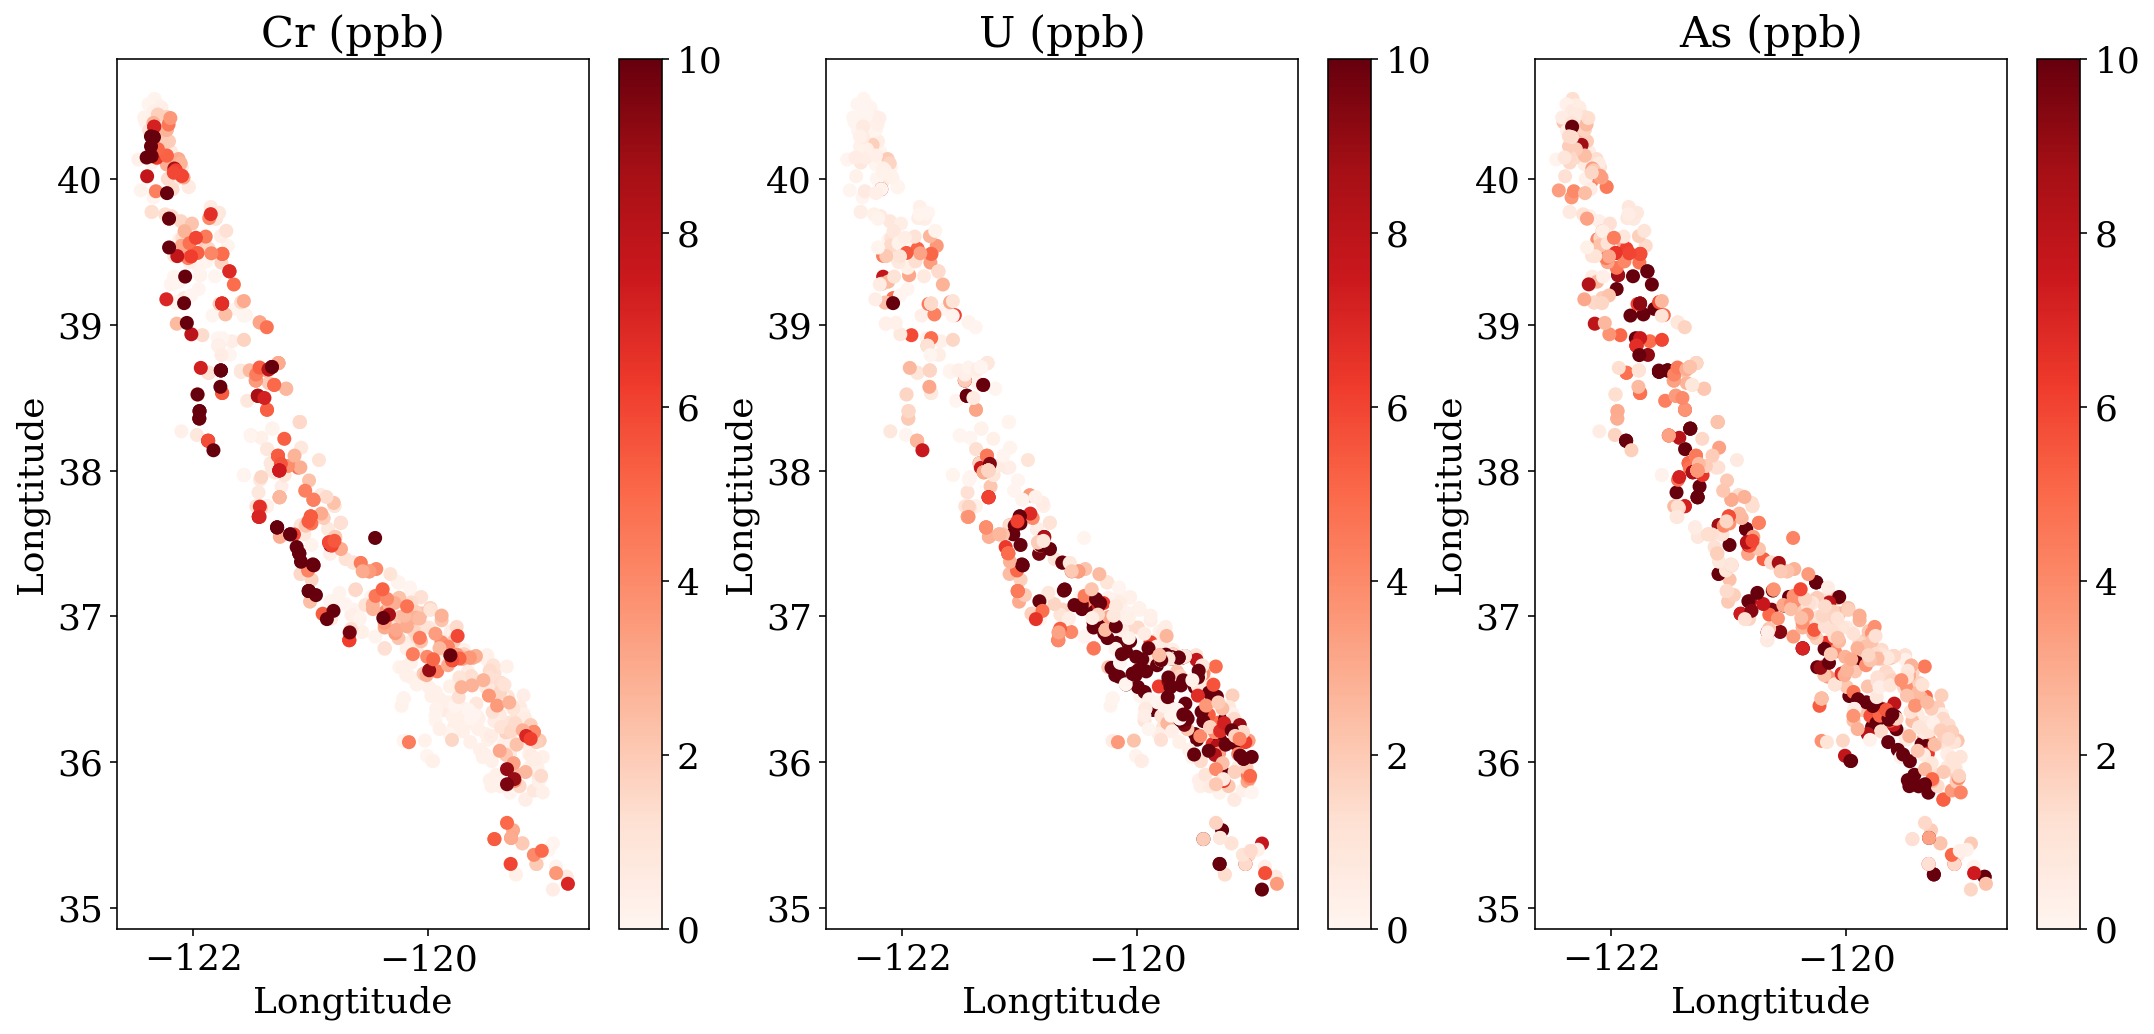

In [ ]:
# Index(['Al (ppb)', 'As (ppb)', 'Ba (ppb)', 'Ca (ppb)', 'Cl (ppb)', 'Cr (ppb)',
#        'Cu (ppb)', 'F (ppb)', 'Fe (ppb)', 'K (ppb)', 'Mg (ppb)', 'Mn (ppb)',
#        'Mo (ppb)', 'Ni (ppb)', 'NO3 (ppb)', 'Pb (ppb)', 'Se (ppb)',
#        'SO4 (ppb)', 'Sr (ppb)', 'U (ppb)', 'V (ppb) ', 'Zn (ppb)'],
#       dtype='object')

# You can change the name of different compositions and visualize them on the map

matplotlib.rcParams.update({'font.size': 18})
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,8))

plot1 = ax1.scatter(data['Longitude'],data['Latitude'],c = data['Cr (ppb)'],cmap = 'Reds',vmin = 0, vmax = 10)
plt.colorbar(plot1,ax=ax1)
ax1.set_xlabel('Longtitude')
ax1.set_ylabel('Longtitude')
ax1.set_title('Cr (ppb)')

plot2 = ax2.scatter(data['Longitude'],data['Latitude'],c = data['U (ppb)'],cmap = 'Reds',vmin = 0, vmax = 10)
plt.colorbar(plot2,ax=ax2)
ax2.set_xlabel('Longtitude')
ax2.set_ylabel('Longtitude')
ax2.set_title('U (ppb)')

plot3 =ax3.scatter(data['Longitude'],data['Latitude'],c = data['As (ppb)'],cmap = 'Reds',vmin = 0, vmax = 10)
plt.colorbar(plot3,ax=ax3)
ax3.set_xlabel('Longtitude')
ax3.set_ylabel('Longtitude')
ax3.set_title('As (ppb)')


# Scatter plot

Text(0, 0.5, 'Cr (ppb)')

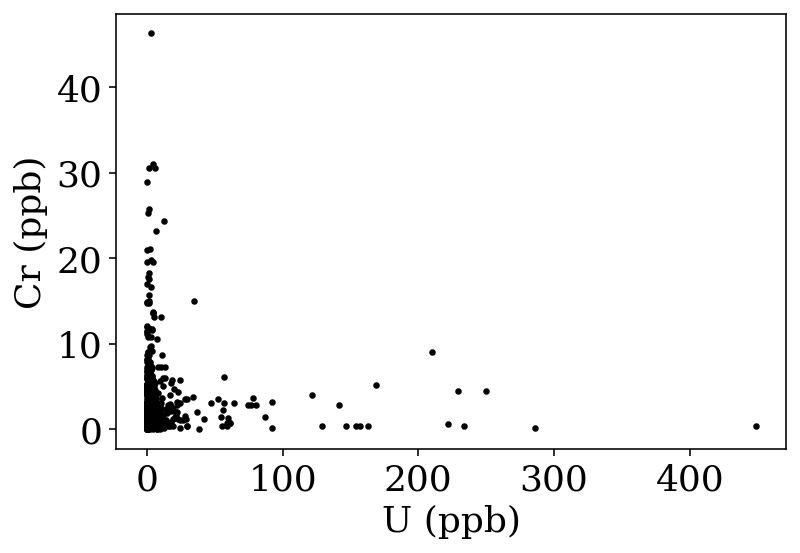

In [ ]:
plt.scatter(data['U (ppb)'],data['Cr (ppb)'], color = 'black',s = 5)
plt.xlabel('U (ppb)')
plt.ylabel('Cr (ppb)')

# Log-ratio transformation

## Scatter plot of log-ratio

Text(0, 0.5, 'log(Cr (ppb)/SO4 (ppb))')

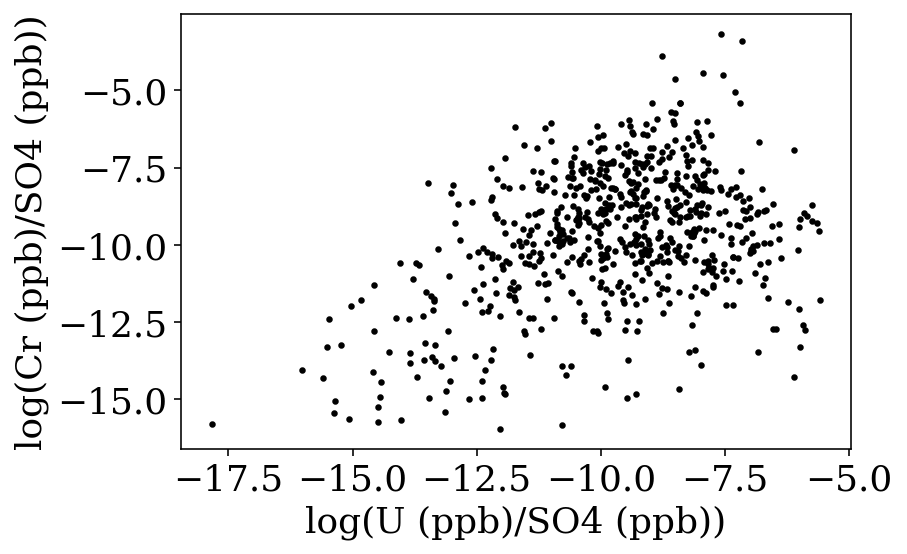

In [ ]:
plt.scatter(np.log(data['U (ppb)']/data['SO4 (ppb)']),np.log(data['Cr (ppb)']/data['SO4 (ppb)']), color = 'black',s = 5)
plt.xlabel('log(U (ppb)/SO4 (ppb))')
plt.ylabel('log(Cr (ppb)/SO4 (ppb))')

## [alr] Additive log-ratio transformation

In [ ]:
## load compositional data analysis package
! pip install scikit-bio
from skbio.stats.composition import *
## compositional data from geochemical dataset
compositional_data = np.array(data.values[:,6:-1],dtype = 'float64')
columns_name = data.columns[6:-1]

     |████████████████████████████████| 8.4 MB 25.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-bio: filename=scikit_bio-0.5.6-cp37-cp37m-linux_x86_64.whl size=1456862 sha256=b5184e46211a66d6c44b0a27d6ba6fc362dffbb94194b7637ddc22b1c626b908
  Stored in directory: /root/.cache/pip/wheels/7e/fa/86/a8b3b3b1187f0b0997fca40cdb7dd0d81a57ff061010e4464d
  Created wheel for hdmedians: filename=hdmedians-0.14.2-cp37-cp37m-linux_x86_64.whl size=453191 sha256=d07c3a4538fb7362c265c14709aa3ba61e736e3ec50feade3c748abc71b75b00
  Stored in directory: /root/.cache/pip/wheels/56/5d/28/fb40426fbf6a8c3af88376a227130bbdf81e00177123e1398e
Successfully built scikit-bio hdmedians


In [ ]:
def alr(data, columns_name, choice_D = -1):
    # choice D: default = -1, the last component
    alr_result = np.log(data/data[:,choice_D].reshape(-1,1))
    name_D = columns_name[choice_D]
    columns_name = np.delete(columns_name,choice_D,0)
    alr_result = pd.DataFrame(data = np.delete(alr_result, choice_D, 1), columns = [('log(')+str(name)+'/'+str(name_D)+')' for name in columns_name])
    return alr_result

In [ ]:
alr_data = alr(compositional_data, columns_name)

Text(0, 0.5, 'log(Cr (ppb)/Zn (ppb))')

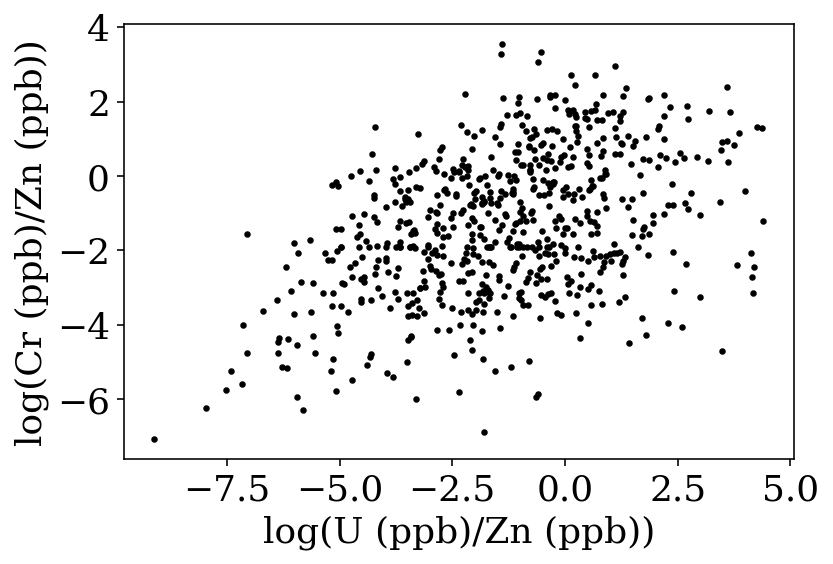

In [ ]:
alr_name1 = 'log(U (ppb)/Zn (ppb))'
alr_name2 = 'log(Cr (ppb)/Zn (ppb))'
plt.scatter(alr_data[alr_name1],alr_data[alr_name2],color = 'black',s = 5)
plt.xlabel(alr_name1)
plt.ylabel(alr_name2)

## [clr] Centered log-ratio transformation

Centered by geometric mean

In [ ]:
clr_data = clr(compositional_data)
clr_data = pd.DataFrame(clr_data, columns = ['clr('+str(name) + ')' for name in columns_name])

Text(0, 0.5, 'clr(Cr (ppb))')

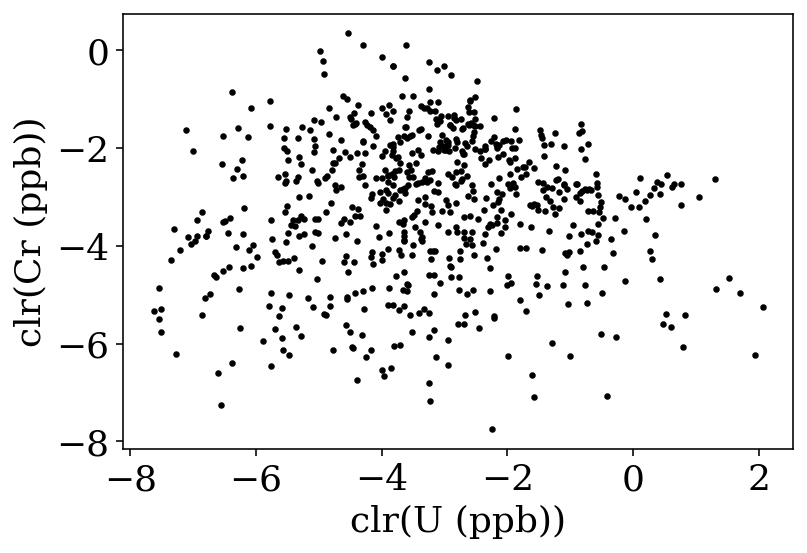

In [ ]:
clr_name1 = 'clr(U (ppb))'
clr_name2 = 'clr(Cr (ppb))'
plt.scatter(clr_data[clr_name1],clr_data[clr_name2],color = 'black',s = 5)
plt.xlabel(clr_name1)
plt.ylabel(clr_name2)